<a href="https://colab.research.google.com/github/shaifali1102/Supervised-Learning/blob/main/KNN_Practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## KNN

- KNN is a non parametric algorithm
- ideal for non-linear multi-class data
- assumes homogeneous neighbourhood
- heavily impacted by outliers
- predicts class of a query point based on its neighbourhood
- Working of KNN:
  - find distance between query point(xq) and all training data
  - sort all distances
  - pick the first k nearest neighbours
  - take majority vote to predict class
- K should be odd to avoid getting tie in a majority vote
- if there's still a tie, randomnly pick the class lable from any of the tied classes
- Curse of dimensionality
    - When dimension is low, datapoints will be far apart, euclidean distance between points becomes large
    - When dimension is high, datapoints will be close to each other, euclidean distance between points becomes very small, this is called Curse of dimensionality
- Distance Metrics
    1. Euclidean - for low dimensional data, fails for high dimensional data
    2. Cosine similarity - for high dimensional data
    3. Manhattan - when data is map like
    4. Minkowski - useful when a custom distance is needed
- Bias-Variance Tradeoff:
    - if k is small -> low bias, high variance -> model overfits
    - if k is large -> high bias, low variance -> model underfits
- KNN for categorical features
    - categorial features can be converted to numerical using OHE or target encoding
    - Target encoding is preferred as OHE can increase dimensions
    - With OHE, we can use cosine similarity as it ranges from [-1, 1]
      - it focuses on direction of the vectors
      - effectively ignores irrelevant features
      - makes KNN more robust to high-dimensional sparse data
- Time Complexity
    - O(1) -> no computation during training, knn only stores data
- Space Complexity
    - O(nd) -> stores entire training data
    - n -> number of samples, d -> number of features
- Test Time Complexity
    - distance b/w xq and training data = O(nd)
    - sort data = O(nlogn)
    - pick nearest neighbour = O(k)
    - majority vote = O(k)
    - O(k) is ignored because k <<< n,d
    - Complexity = O(nd + nlogn)
- **Locality Sensitive Hashing** can reduce the test time complexity
    - google images uses KNN with LSH to provide pictures of famous monuments when searching a city's name
    - Hashtable - Key value pair
    - LSH uses randomized hashing function which creates unique keys for the hashtable
        - eg, random vector = [10, -20, 30]
        - h(x) = f1, f2, f3 >= v, then value = 1 else 0
        - so for row x(1) = 5, 10, 7
        - h(x) would be [0,1,0]
    - LSH groups same Hashfunctions as key with datapoints establishing that these datapoints are near
    - to increase testing time, LSH finds h(xq)
        - eg, h(xq) = [0,1,0]
        - then we run KNN only for datapoints with h(x) = [0,1,0] and not the whole data
        - Therefore, KNN is performed only on a subset of data
- KNN for imputation
    - for missing value in fj feature at i row
      1. exclude fj from data
      2. xq = xi -> find distance b/w xi and rest of the data
      3. say k=4, find 4 nearest neighbours
      4. get avg(fj1, fj2, fj3, fj4) of these nearest neighbours. This avg is used to impute the missing fj value at i row.



## Blinkit Case Study

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# import blink-it data
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 22.8MB/s]


In [4]:
df = pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


### Problem Statement
Blinkit needs optimal number of delivery partner for its stores. It has classified its stores into 3 classes based on how much is delivered from that store:
1. Class 1: High Traffic(Needs high number of delivery partners)
2. Class 2: Moderate Traffic(Needs moderate number of delivery partners)
3. Class 3: Low Traffic(Needs low number of delivery partners)

In [5]:
df.shape

(440, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Region            440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
 7   class             440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df['Region'] = df['Region'].astype('category')
df['class'] = df['class'].astype('category')

In [ ]:
df.describe(include='all')

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
count,440.0,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0
unique,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
top,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
freq,316.0,NaN,NaN,NaN,NaN,NaN,NaN,180.0
mean,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,NaN
std,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,NaN
min,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,NaN
25%,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,NaN
50%,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,NaN
75%,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,NaN


In [14]:
df['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


In [13]:
df['class'].value_counts()

,count
class,
2,180
3,173
1,87


In [23]:
# Features & Target

X = df.loc[:, ~df.columns.isin(['class'])]
y = df['class']

print(X.shape)
print(y.shape)

(440, 7)
(440,)


<Axes: xlabel='count', ylabel='class'>

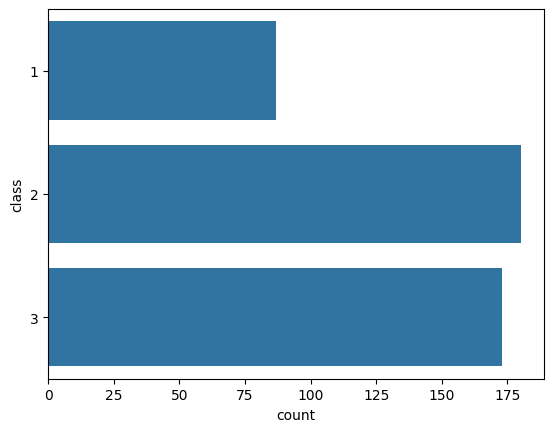

In [15]:
sns.countplot(y)

In [17]:
# Dimensionality Reduction using PCA for Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new.shape

(440, 2)

<Axes: xlabel='f1', ylabel='f2'>

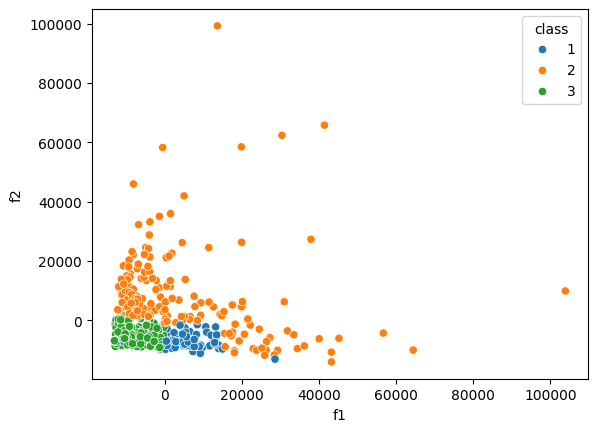

In [19]:
df2 = pd.DataFrame(X_new, columns=['f1','f2'])
df2['class'] = y

sns.scatterplot(data=df2, x='f1', y='f2', hue='class')

### Observation
1. We can see **data imbalance** between the three classes so we will use **SMOTE** to balance the classes for better prediction.
2. Data is non-Linear in nature
3. Algorithms to predict class -
    - Logistic Regression will need a lot of hyperparameter tuning
    - OVR Logistic Regression might work but if classes change from 3 to 50, it will become expensive and time consuming
    - KNN is ideal because
        - non-linear multi-class data
        - by looking at the viz, we can conclude that we can predict class of a query point based in its neighbourhood

## KNN Implementation from Scratch

In [21]:
# Train-Test Split
from sklearn.model_selection import train_test_split

#Train-Val and Test split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#Train and Val split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247,)
(83, 7) (83,)
(110, 7) (110,)


In [24]:
#SMOTE for class balancing
from imblearn.over_sampling import SMOTE

smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()



,count
class,
1,99
2,99
3,99


### Standardization
Since KNN is a distance based algorthim, we should perform standardization on the data

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_sm)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

y_train = y_sm

### Working of KNN

We will take our query point, xq as 50 and k as 5

In [26]:
xq = X_val_scaled[50]
xq

array([ 0.70942165, -0.60320525, -0.44978492, -0.65133957, -0.30371787,
       -0.50694736, -0.28002284])

1. Find distance between xq and training data

In [29]:
dist = np.sqrt(np.sum((xq - X_train_scaled)**2, axis=1))
print(X_train_scaled.shape, dist.shape)

(297, 7) (297,)


2. Sort the distances

In [42]:
#Couple distances and class labels
distances = np.array([(dist[i], y_train[i]) for i in range(len(dist))])
print(distances[:5])

# Sort the distances array based on the first column (distance)
sorted_distances = distances[distances[:,0].argsort()]


[[2.84474978 2.        ]
 [1.17573594 1.        ]
 [3.99402074 2.        ]
 [1.25912116 3.        ]
 [0.70500111 3.        ]]


3. Find the first K neighbours

In [62]:
k=5
classes, counts = np.unique(sorted_distances[:k,1], return_counts=True)


Predicted class is 3.0 with 5 votes in 5 neighbours


4. Find the majority vote

In [63]:
index = counts.argmax()
majority_vote = counts[index]
majority_class = classes[index]

print(f"Predicted class is {majority_class} with {majority_vote} votes in {k} neighbours")

Predicted class is 3.0 with 5 votes in 5 neighbours


5. Verify with y_val

In [64]:
print(f"Actual class is {y_val[50]}")

Actual class is 3


Our KNN algo has correctly predicted the class label to be 3

### Consolidating into one function

In [68]:
def knn(X, y, xq, k=5):
  #Find euclidean distance
  dist = np.sqrt(np.sum((xq - X)**2, axis=1))

  #Storing distances and classes together
  distances = np.array([(dist[i],y[i]) for i in range(len(dist))])

  #Sorting the distances
  distances_sorted = distances[distances[:,0].argsort()]

  #Finding majority vote
  classes,counts = np.unique(distances_sorted[:k,1], return_counts=True)
  index = counts.argmax()
  majority_vote = counts[index]
  majority_class = classes[index]

  return int(majority_class), majority_vote

In [69]:
k = 5
maj_class, maj_vote = knn(X_train_scaled, y_train, X_val_scaled[50], k)

print(f"The predicted class is {maj_class} and actual class is {y_val[50]}")

The predicted class is 3 and actual class is 3


### Running Test Data

In [77]:
y_pred = []
print(X_test_scaled.shape)
for i in range(X_test_scaled.shape[0]):
  maj_class, maj_vote = knn(X_train_scaled, y_train, X_test_scaled[i], 5)
  y_pred.append(maj_class)

len(y_pred)


(110, 7)


110

### Finding accuracy with Confusion matrix

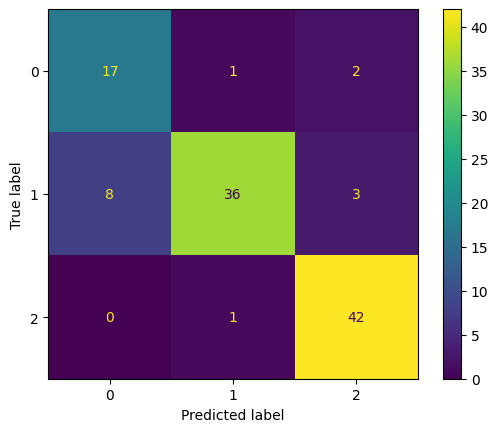

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Finding accuracy with classification report

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.85      0.76        20
           2       0.95      0.77      0.85        47
           3       0.89      0.98      0.93        43

    accuracy                           0.86       110
   macro avg       0.84      0.86      0.85       110
weighted avg       0.88      0.86      0.86       110



### Sklearn's KNN Implementation

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean') #default metric is minkowski
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

In [84]:
#Accuracy with Val
knn.score(X_val_scaled, y_val)

0.9036144578313253

### Hyperparameter Tuning

In [110]:
# Hyperparameter Tuning
accuracy = []

for k in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  accuracy.append(knn.score(X_val_scaled, y_val))

acc = np.array([(i+1, accuracy[i]) for i in range(len(accuracy))])
acc_sorted = acc[acc[:,1].argsort()]
print(acc_sorted[::-1][:5])

best_k = np.argmax(accuracy)
print(f"Top k value is {best_k+1} with accuracy {accuracy[best_k]}")

[[ 3.          0.92771084]
 [ 5.          0.90361446]
 [ 1.          0.90361446]
 [10.          0.89156627]
 [ 7.          0.89156627]]
Top k value is 3 with accuracy 0.927710843373494


#### Training on best k

In [118]:
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean') #default metric is minkowski
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [119]:
# Test Data
knn.score(X_test_scaled, y_test)

0.8545454545454545

## KNN based Imputation

In [1]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 29.2MB/s]


In [4]:
df_imp = pd.read_csv('knn_imputation.csv')
df_imp.head()

,Unnamed: 0,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [8]:
df_imp.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df_imp.isna().sum()

,0
Region,8
Fresh,13
Milk,15
Grocery,9
Frozen,8
Detergents_Paper,10
Delicassen,11


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer(n_neighbors=5))
])

X_transformed = pipeline.fit_transform(df_imp)
X_transformed = pd.DataFrame(X_transformed, columns = df_imp.columns)
X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [13]:
X_transformed.isna().sum()

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


KNN Imputer was able to impute all missing values from this dataset